# Logistic Regression Project
In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.


This data set contains the following features:


'Daily Time Spent on Site': consumer time on site in minutes

'Age': cutomer age in years

'Area Income': Avg. Income of geographical area of consumer

'Daily Internet Usage': Avg. minutes a day consumer is on the internet

'Ad Topic Line': Headline of the advertisement

'City': City of consumer

'Male': Whether or not consumer was male

'Country': Country of consumer

'Timestamp': Time at which consumer clicked on Ad or closed window

'Clicked on Ad': 0 or 1 indicated clicking on Ad



# Import Libraries

Import a few libraries you think you'll need (Or just import them as you go along!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the Data
Read in the advertising.csv file and set it to a data frame called ad_data.

In [2]:
Advert=pd.read_csv(r"/content/advertising-221207-091540.csv")

 Check the head of ad_data

In [3]:
Advert.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


* Use info and describe() on ad_data*

In [4]:
Advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
Advert.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
Advert.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [8]:
Advert.select_dtypes(include=object)

,Ad Topic Line,City,Country,Timestamp
0,Cloned 5thgeneration orchestration,Wrightburgh,Tunisia,2016-03-27 00:53:11
1,Monitored national standardization,West Jodi,Nauru,2016-04-04 01:39:02
2,Organic bottom-line service-desk,Davidton,San Marino,2016-03-13 20:35:42
3,Triple-buffered reciprocal time-frame,West Terrifurt,Italy,2016-01-10 02:31:19
4,Robust logistical utilization,South Manuel,Iceland,2016-06-03 03:36:18
...,...,...,...,...
995,Fundamental modular algorithm,Duffystad,Lebanon,2016-02-11 21:49:00
996,Grass-roots cohesive monitoring,New Darlene,Bosnia and Herzegovina,2016-04-22 02:07:01
997,Expanded intangible solution,South Jessica,Mongolia,2016-02-01 17:24:57
998,Proactive bandwidth-monitored policy,West Steven,Guatemala,2016-03-24 02:35:54


In [9]:
#Advert.drop(Advert.select_dtypes(include=object),axis=1)

# Exploratory Data Analysis
Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

<Axes: ylabel='Frequency'>

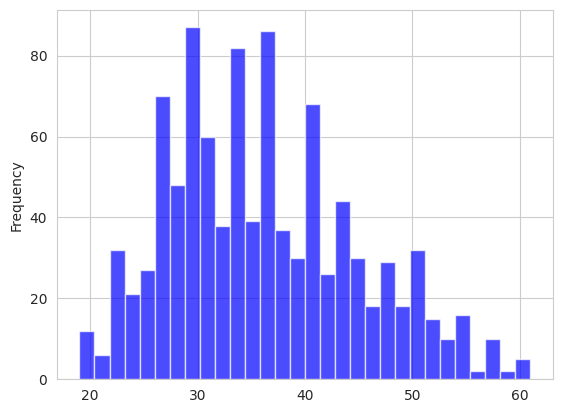

In [10]:
sns.set_style("whitegrid")
Advert['Age'].plot.hist(bins=30,color='blue',alpha=0.7)

Create a jointplot showing Area Income versus Age.

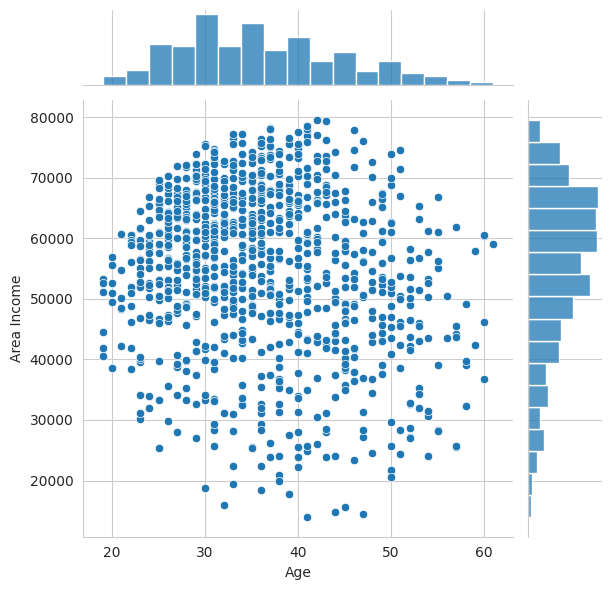

In [11]:
sns.jointplot(x='Age', y='Area Income',  data=Advert)

Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.

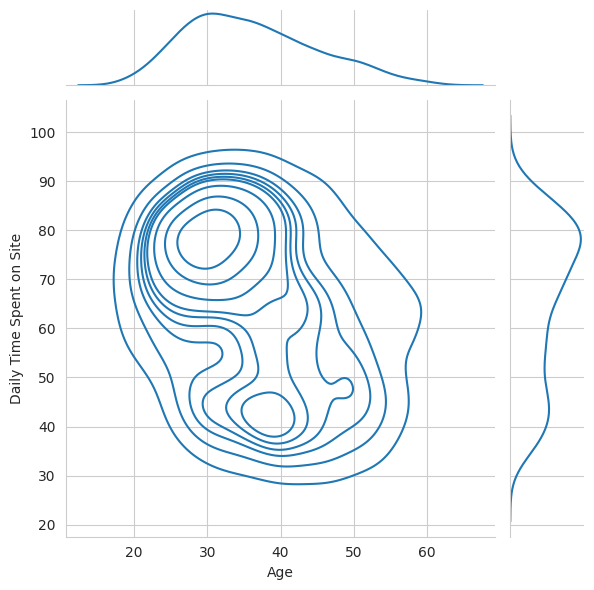

In [12]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', kind= "kde",palette="pink", data=Advert)

 Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'

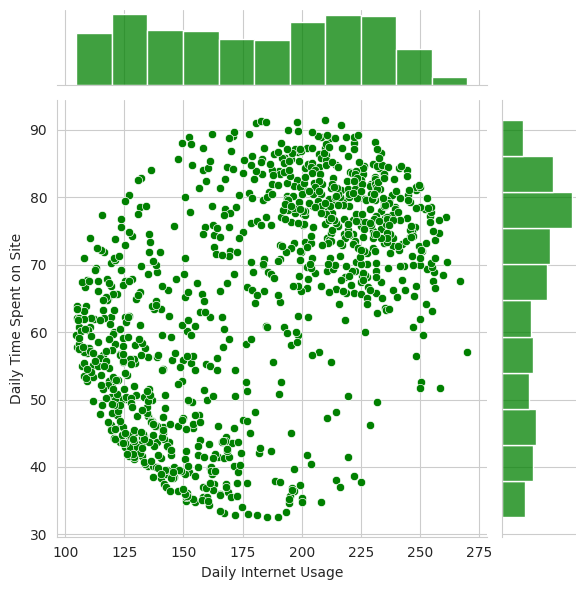

In [13]:
sns.jointplot(x="Daily Internet Usage", y='Daily Time Spent on Site', color= 'green', data=Advert)

Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.

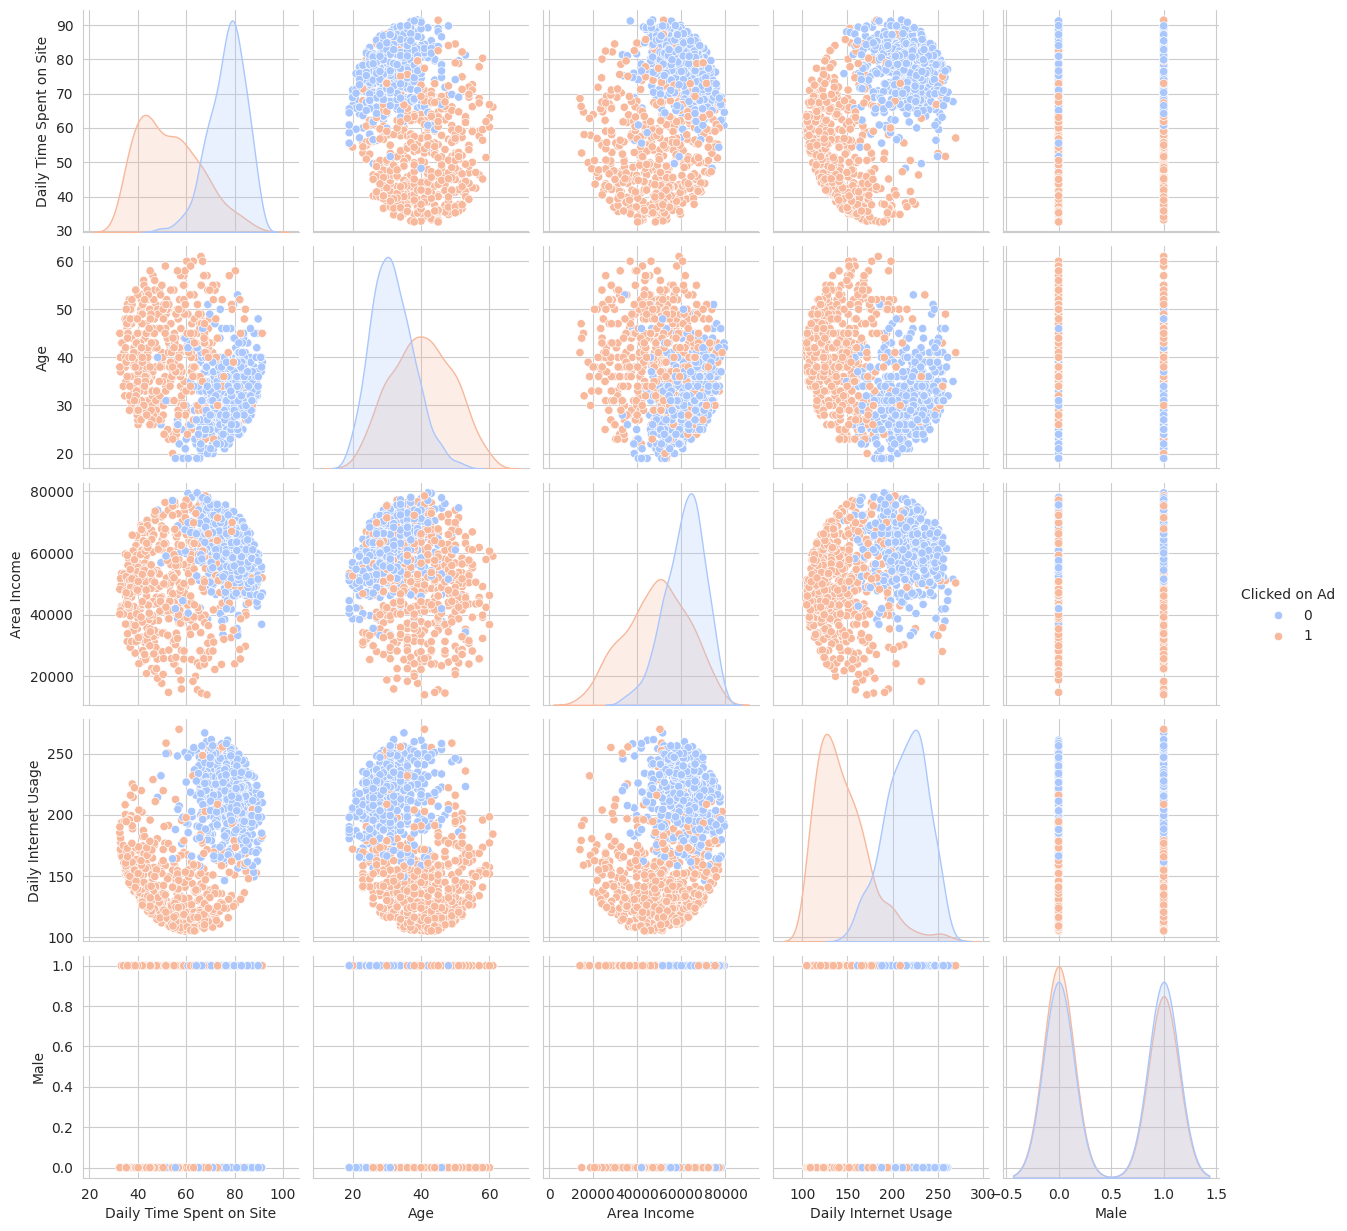

In [14]:
sns.pairplot(Advert, hue='Clicked on Ad',palette='coolwarm')

# Logistic Regression
Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X=Advert.drop(['Clicked on Ad','City','Country','Timestamp','Ad Topic Line'],axis=1)

In [17]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [18]:
y=Advert['Clicked on Ad']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

* Train and fit a logistic regression model on the training set.*

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr= LogisticRegression(solver='lbfgs', max_iter=1000)

In [22]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

# Predictions and Evaluations
** Now predict values for the testing data.**

In [23]:
prediction=lr.predict(X_test)

In [24]:
prediction

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

* Create a classification report for the model.*

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [27]:
print(confusion_matrix(y_test, prediction))

[[149   8]
 [ 14 129]]


In [28]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

